**Integrantes:**

-Felipe Boucai

-Felipe Nahum

-Mauricio Boscolo

In [1]:
import pandas as pd
import numpy as np
import seaborn.objects as so
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
from statistics import mode

## Preprocesamiento

1)

In [2]:
df = pd.read_csv('FBRef2020-21.csv')

2)

In [3]:
df = df[df['Min'] >= 500]

3)

In [4]:
df = df.dropna(axis=1, thresh=len(df) - 100)
df = df.dropna()

4)

In [5]:
df = df.reset_index()

5)

In [6]:
indice_ast = df.columns.get_loc('Ast/90')

data_num = df.iloc[:,indice_ast:]

data_num

,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0.00,0.14,0.14,0.00,0.09,0.09,1.11,0.14,0.00,0.06,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,0.19,0.19,0.39,0.11,0.22,0.33,2.13,0.84,0.00,-0.03,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,0.17,0.14,0.31,0.18,0.11,0.28,1.03,0.41,0.03,0.03,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,0.21,0.21,0.42,0.14,0.12,0.26,1.47,0.63,0.07,0.09,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


6)

a)

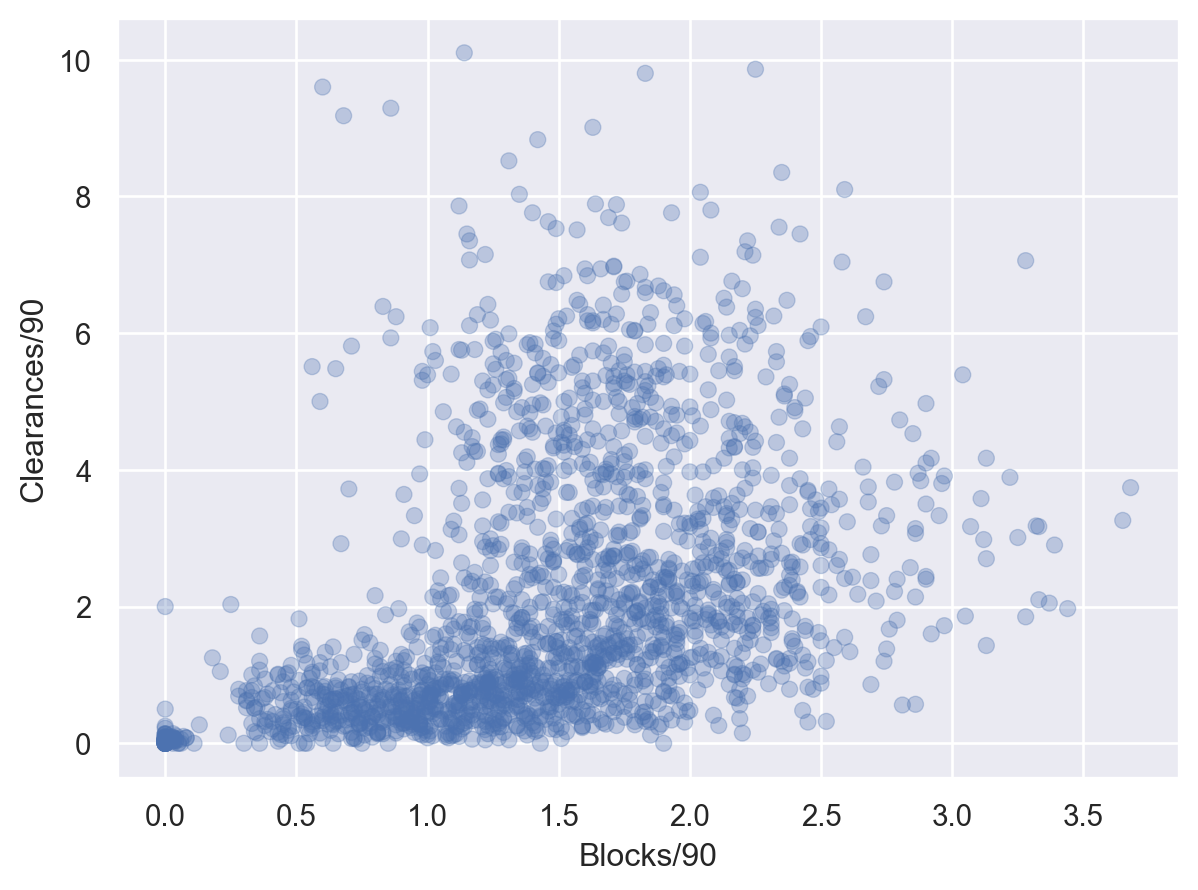

In [7]:
(
    so.Plot(
            x = data_num['Blocks/90'],
            y = data_num['Clearances/90'],

    )
    .add(so.Dot(alpha='0.3'))

)    



No podemos identificar distintos clusters.

b)

In [8]:
data_num_M = data_num.to_numpy()

X = StandardScaler().fit_transform(data_num_M)

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.28561673 0.20587363]
[245.56053433 208.48129964]


In [9]:
Z = X @ pca.components_.T
pca.components_

array([[ 0.0978309 ,  0.12235278,  0.13646434,  0.11786872,  0.13998799,
         0.15257913,  0.14846314,  0.14481143,  0.04804912,  0.00388841,
        -0.11217634, -0.10807911, -0.09704054, -0.1387503 , -0.14075163,
        -0.0220899 , -0.0066418 , -0.11890092, -0.13395788, -0.12904192,
        -0.1286844 , -0.13709736, -0.12861211, -0.05639394,  0.11292689,
        -0.06678811,  0.08581937,  0.04163036, -0.02132407, -0.1028429 ,
        -0.04243525, -0.10213642,  0.05971853,  0.04562776, -0.05339398,
         0.06916766, -0.09606843, -0.00891837, -0.08881047, -0.02561192,
        -0.06728966, -0.06357359, -0.02772924, -0.01949978,  0.00689255,
        -0.05675786,  0.03777891,  0.07871694,  0.12795614,  0.11575816,
         0.04020264,  0.11591618,  0.10584863,  0.1143932 ,  0.05119275,
         0.11975998,  0.10027436,  0.02938621,  0.07500306,  0.0624046 ,
         0.07322235,  0.03548802, -0.04215959, -0.03407107, -0.08399991,
        -0.0121418 ,  0.07797901, -0.05615928, -0.0

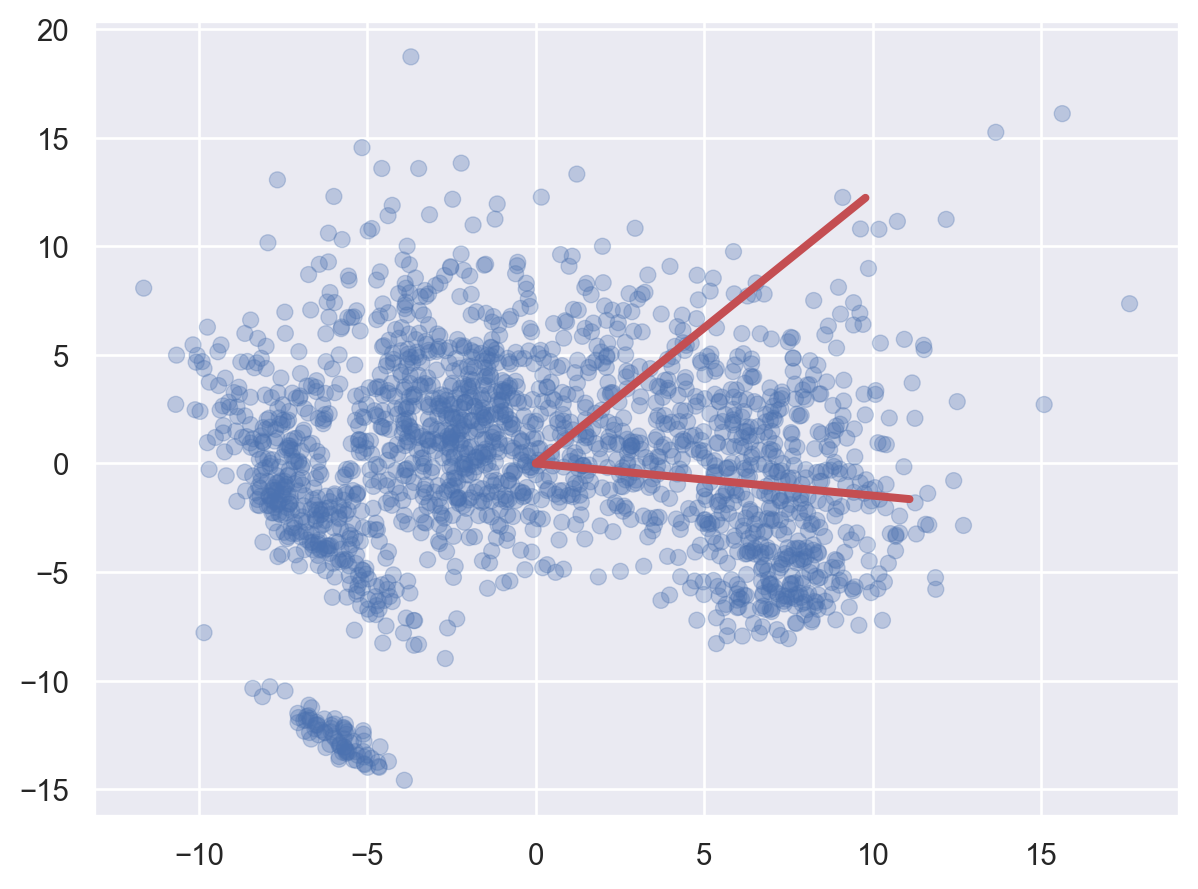

In [10]:
(
    so.Plot(

    )
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha = '0.3'), x = Z[:, 0], y = Z[:,1])
)

En este caso podemos identificar 2 clusters grandes distintos. Luego el grande podria dividirse en otros 3 mas chicos. Sospechamos que esta division se debe a las distintas posiciones de los jugadores (arquero, defensor, mediocampista y delantero) y a sus distintas caracteristicas. Esto lo verificaremos mas adelante.

c)

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(Z)

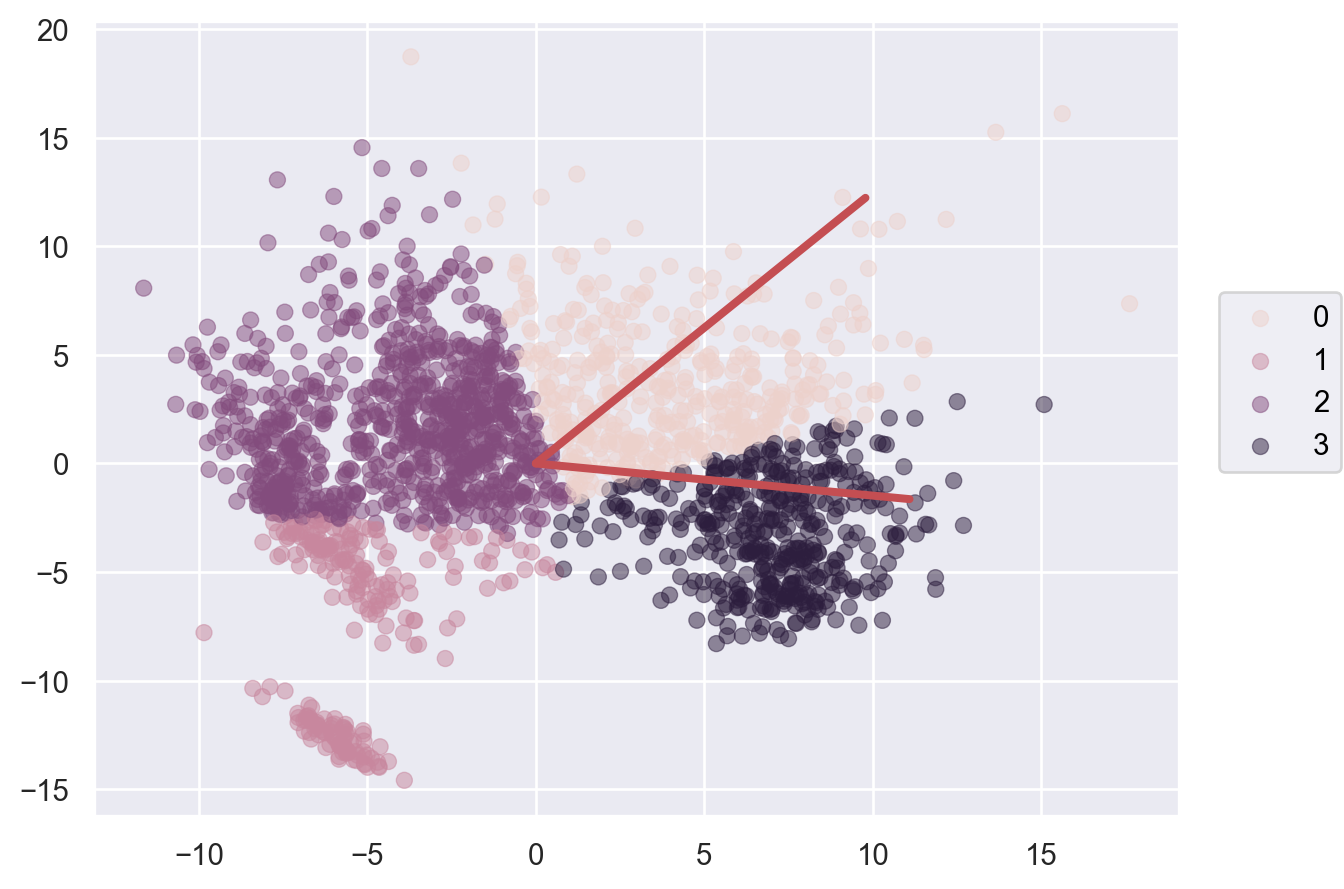

In [12]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha = 0.5), x = Z[:, 0], y = Z[:, 1], color = kmeans.labels_)
)

Las etiquetas asignadas con KMeans no coinciden con los clusters que observamos en el punto anterior.

d)

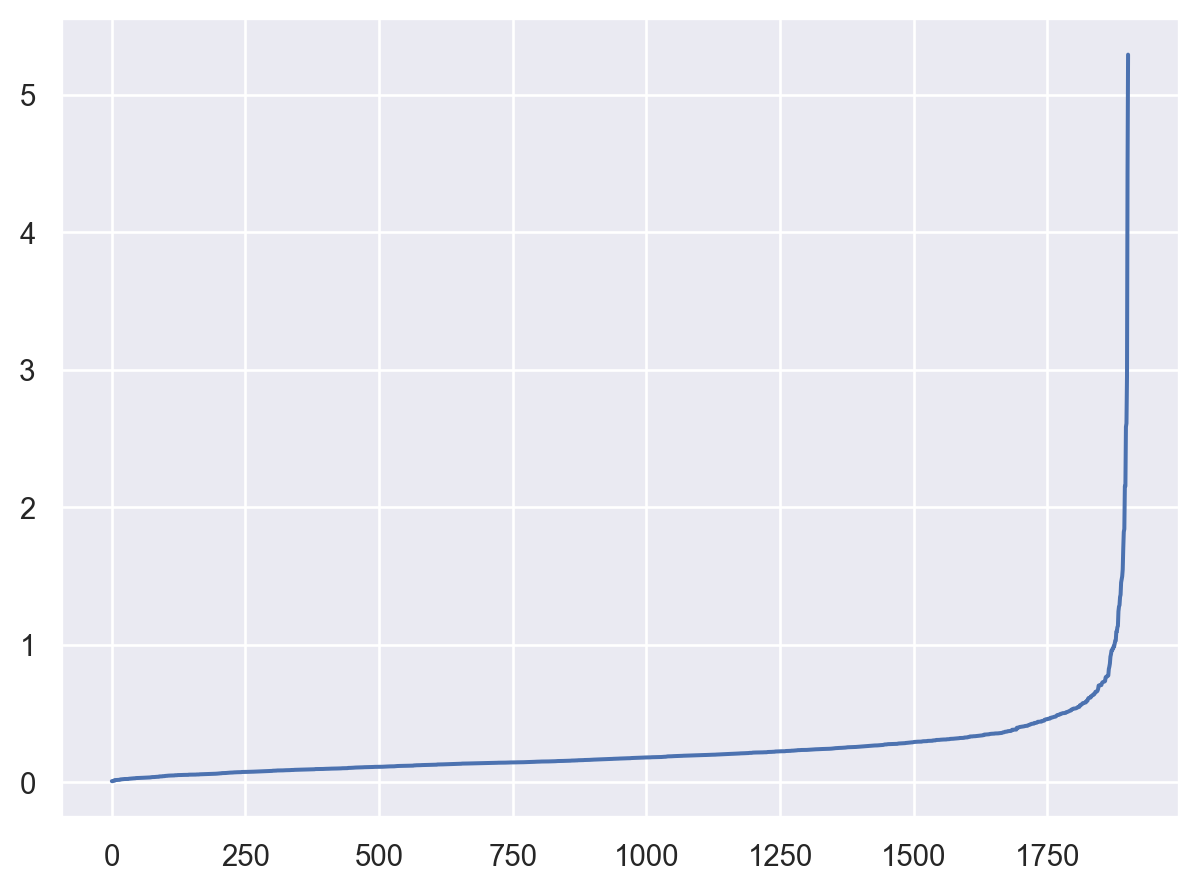

In [13]:
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 2.
neighbors_fit = neighbors.fit(Z)

distances, indices = neighbors_fit.kneighbors(Z)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

Utilizamos KNN para encontrar el valor de epsilon adecuado.

In [14]:
dbscan = DBSCAN(eps=0.65, min_samples=12).fit(Z)
dbscan_label = dbscan.labels_.astype(str)

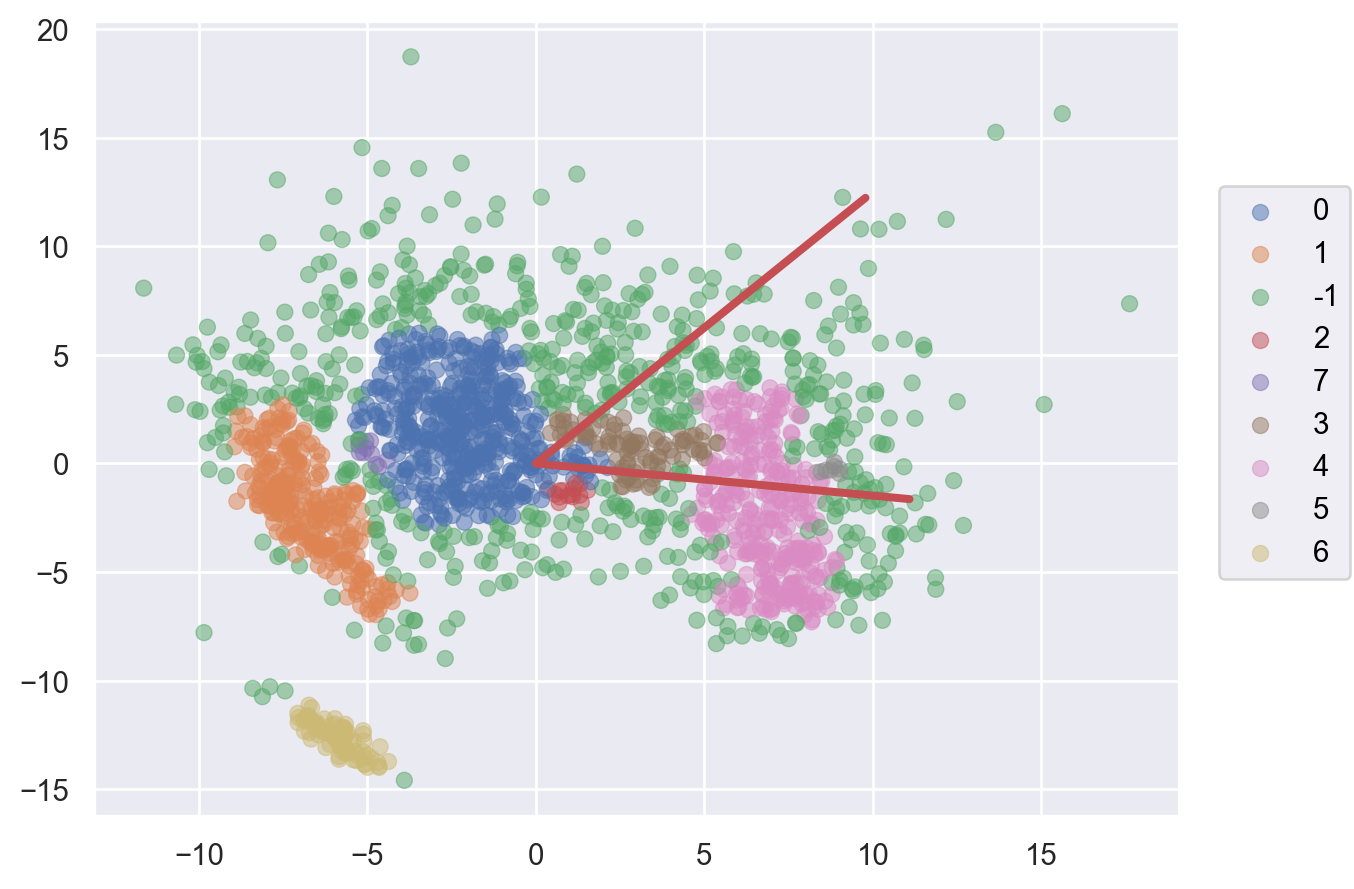

In [15]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha= 0.5), x = Z[:, 0], y = Z[:, 1], color = dbscan_label)
)

In [16]:
pos = pd.DataFrame(Z)
pos.insert(0, 'Pos', df['Pos'])
pos['label'] = dbscan_label
pos_0 = pos[pos['label'] == '6']
pos_1 = pos[pos['label'] == '1']
pos_2 = pos[pos['label'] == '0']
pos_3 = pos[pos['label'] == '4']
print('Cluster 0 (abajo a la izquierda):', pos_0['Pos'].unique())
print('Cluster 1 (medio/izquierda):', pos_1['Pos'].unique())
print('Cluster 2 (medio/centro):', pos_2['Pos'].unique())
print('Cluster 3 (medio/derecha):', pos_3['Pos'].unique())

Cluster 0 (abajo a la izquierda): ['GK']
Cluster 1 (medio/izquierda): ['DF' 'DF,MF' 'MF,DF']
Cluster 2 (medio/centro): ['DF' 'DF,FW' 'DF,MF' 'FW,MF' 'MF' 'MF,DF' 'MF,FW']
Cluster 3 (medio/derecha): ['DF,FW' 'FW' 'FW,DF' 'FW,MF' 'MF' 'MF,DF' 'MF,FW']


Ahora confirmamos que la separacion en clusters se debe principalmente a las distintas posiciones mencionadas anteriormente

e)

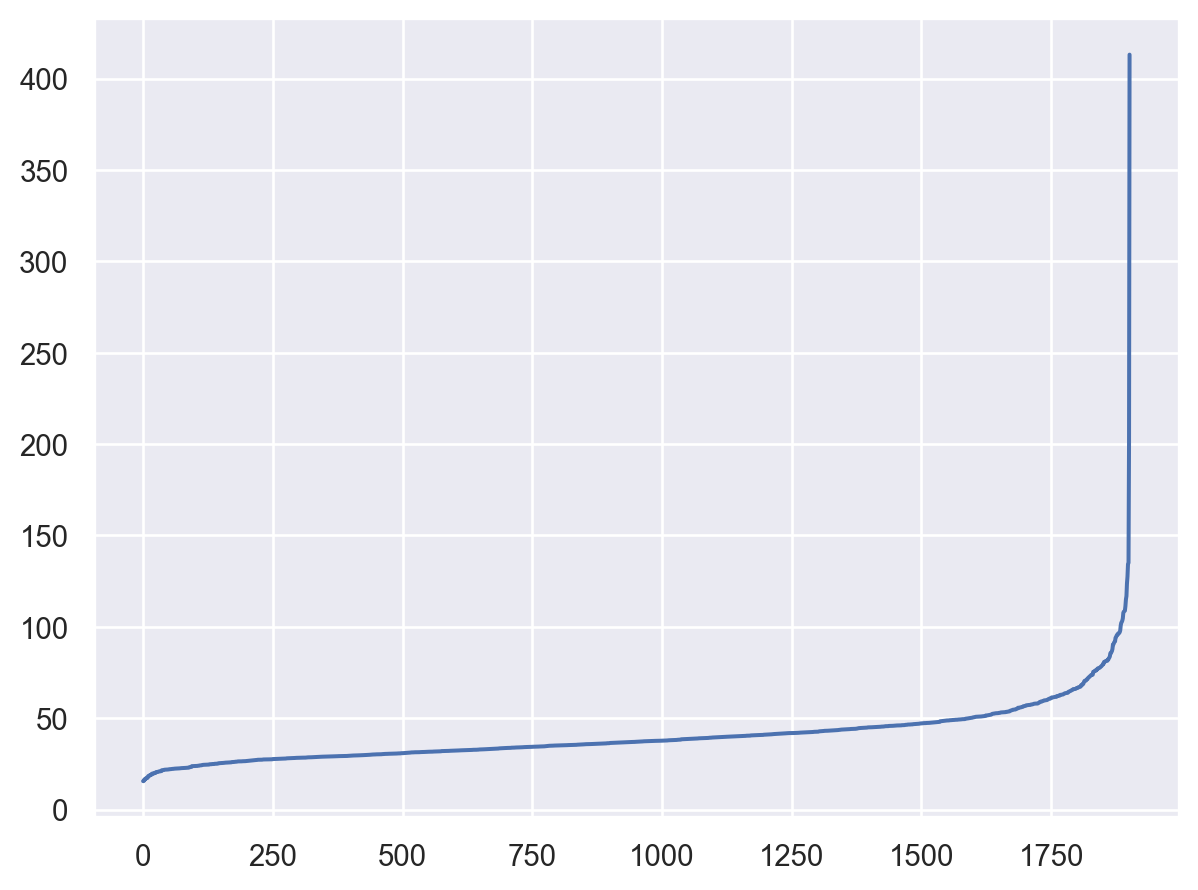

In [17]:
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 2.
neighbors_fit = neighbors.fit(data_num)

distances, indices = neighbors_fit.kneighbors(data_num)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

so.Plot(x = np.arange(len(distances)), y = distances).add(so.Line())

In [18]:
dbscan_orig = DBSCAN(eps=65, min_samples=10).fit(data_num)
dbscan_orig.labels_
dbscan_orig_label = dbscan_orig.labels_.astype(str)

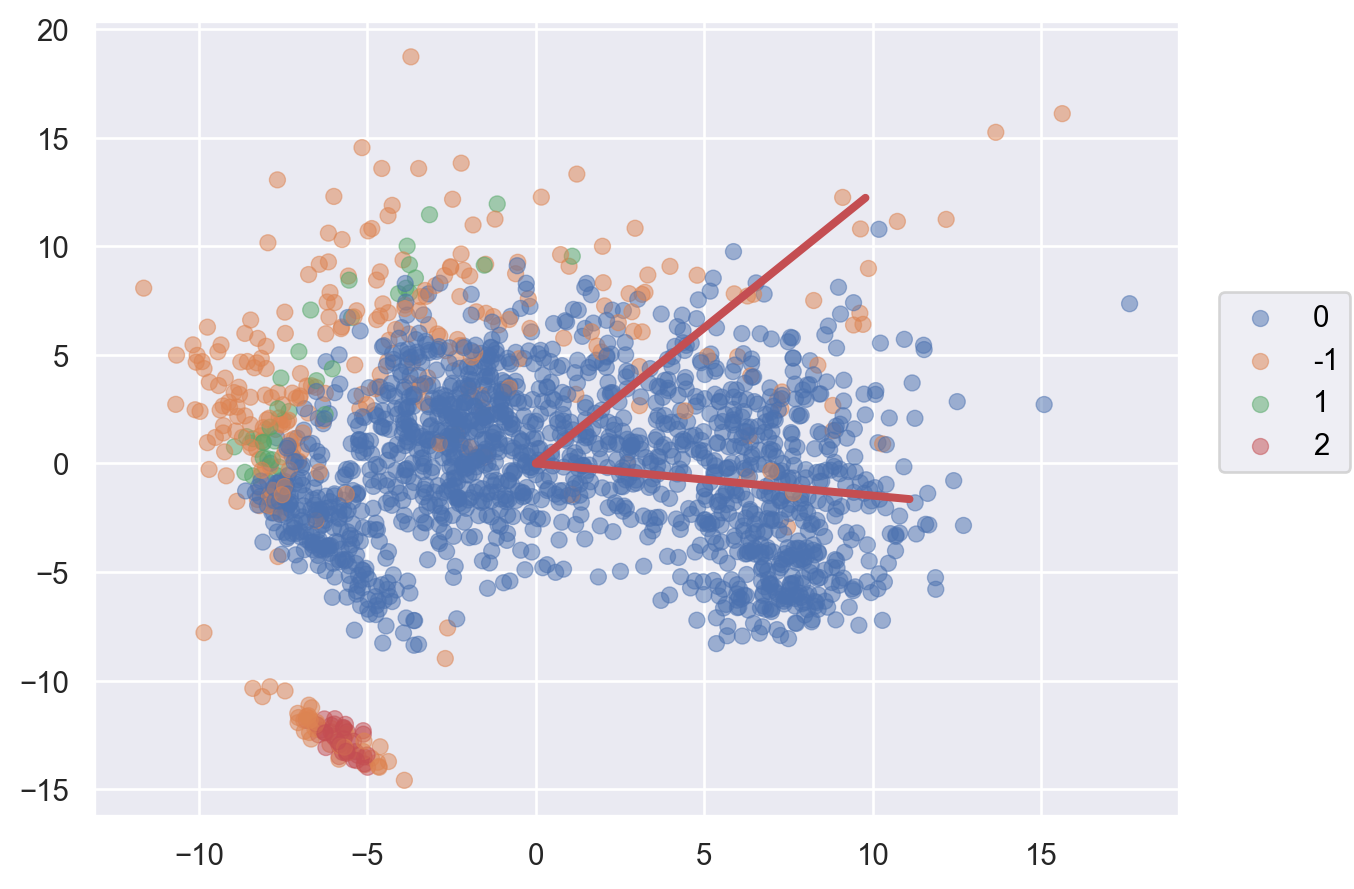

In [19]:
(
    so.Plot()
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.0978309*100], y = [0, 0.12235278*100])
    .add(so.Line(color= 'r', linewidth=3), x = [0, 0.07393905*150], y = [0, -0.01093821*150])
    .add(so.Dot(alpha= 0.5), x = Z[:, 0], y = Z[:, 1], color = dbscan_orig_label)
)

Comparando ambos metodos, notamos que obtuvimos mejores resultados realizando PCA previamente sobre los datos. Ya que pudimos identificar los 4 clusters de nuestra conjetura

### Clasificacion

7)


a)

In [20]:
df['Pos_filt'] = df['Pos'].str.split(',').str[0]

b)

In [21]:
data_clasif = data_num
data_clasif.insert(0, 'Pos_filt', df['Pos_filt'])

In [22]:
data_clasif_y = data_clasif['Pos_filt']
data_clasif_X = data_clasif.drop('Pos_filt', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_clasif_X, data_clasif_y, test_size=0.2, random_state=33)

c)

In [24]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_train, y_train, cv = 20)
    precision.append(pre.mean()*100)

In [25]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

6 83.95505809979494


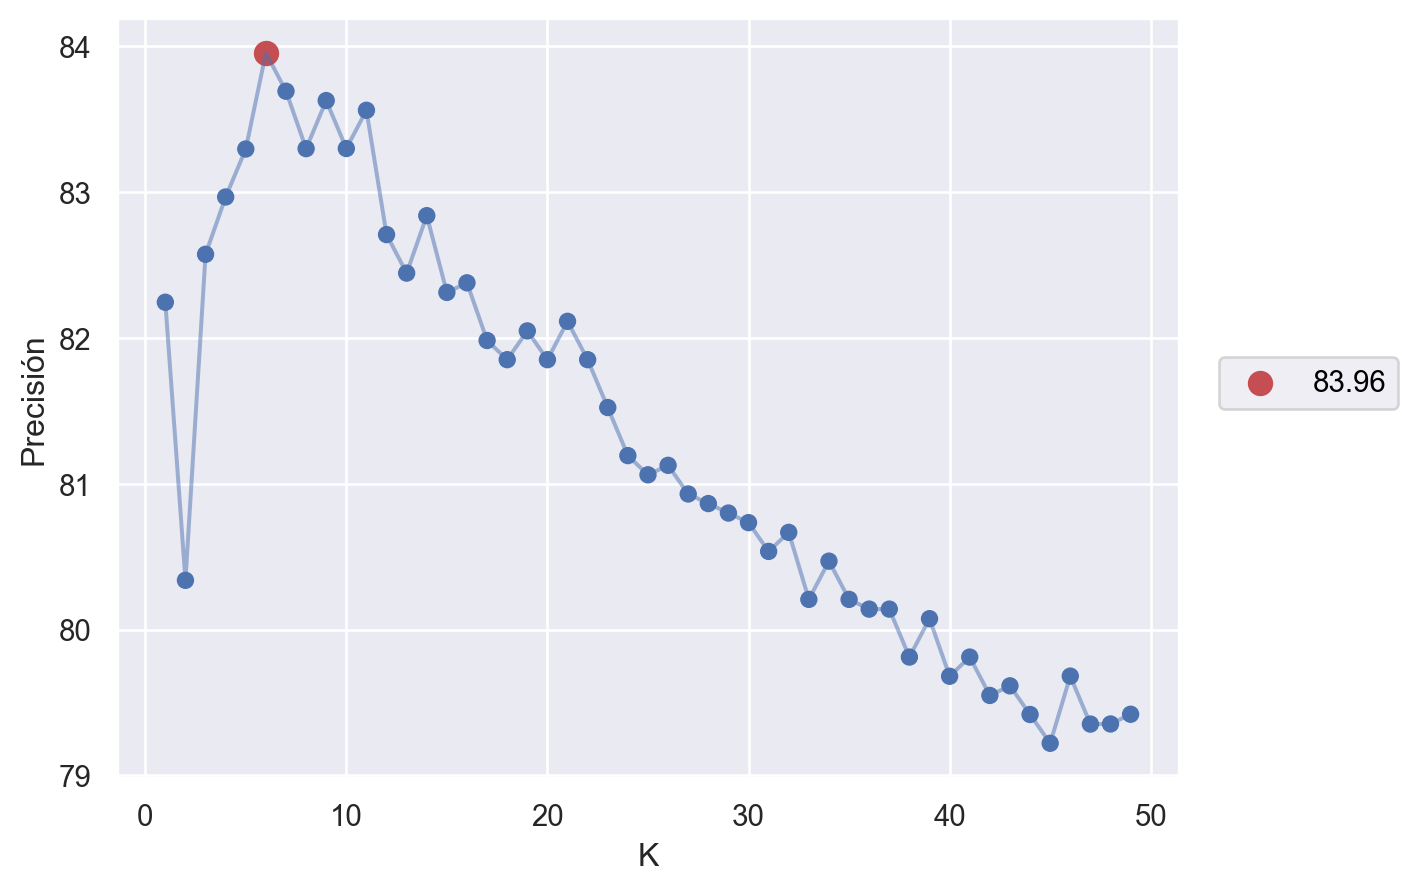

In [26]:
(
    so.Plot()
    .add(so.Line(alpha= 0.5), x = range(1,50), y = precision)
    .add(so.Dot(), x = range(1,50), y = precision)
    .add(so.Dot(color = 'r', pointsize= 9), x = [k], y = [precision[k-1]], label= np.round(np.max(precision),2).astype(str))
    .label(x = 'K', y = 'Precisión')
)

d)

In [27]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_train)

NearestNeighbors(n_neighbors=6)

In [28]:
posiciones = y_train

X_test.index
aciertos = 0
for ind in X_test.index:
    distancias, indices = neighbors.kneighbors(X_test.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == data_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_test.index.shape[0])*100

print('Porcentaje de aciertos: ', np.round(pc_aciertos, 2), '%')

Porcentaje de aciertos:  82.68 %


e)

Con pca:

In [29]:
pca_clasif = pd.DataFrame(Z)
pca_clasif.insert(0, 'Pos_filt', df['Pos_filt'])
pca_clasif_y = pca_clasif['Pos_filt']
pca_clasif_X = pca_clasif.drop('Pos_filt', axis=1)

In [30]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_clasif_X, pca_clasif_y, test_size=0.2, random_state=33)

In [31]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_train_pca, y_train_pca, cv = 20)
    precision.append(pre.mean()*100)

In [32]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

49 74.09347231715653


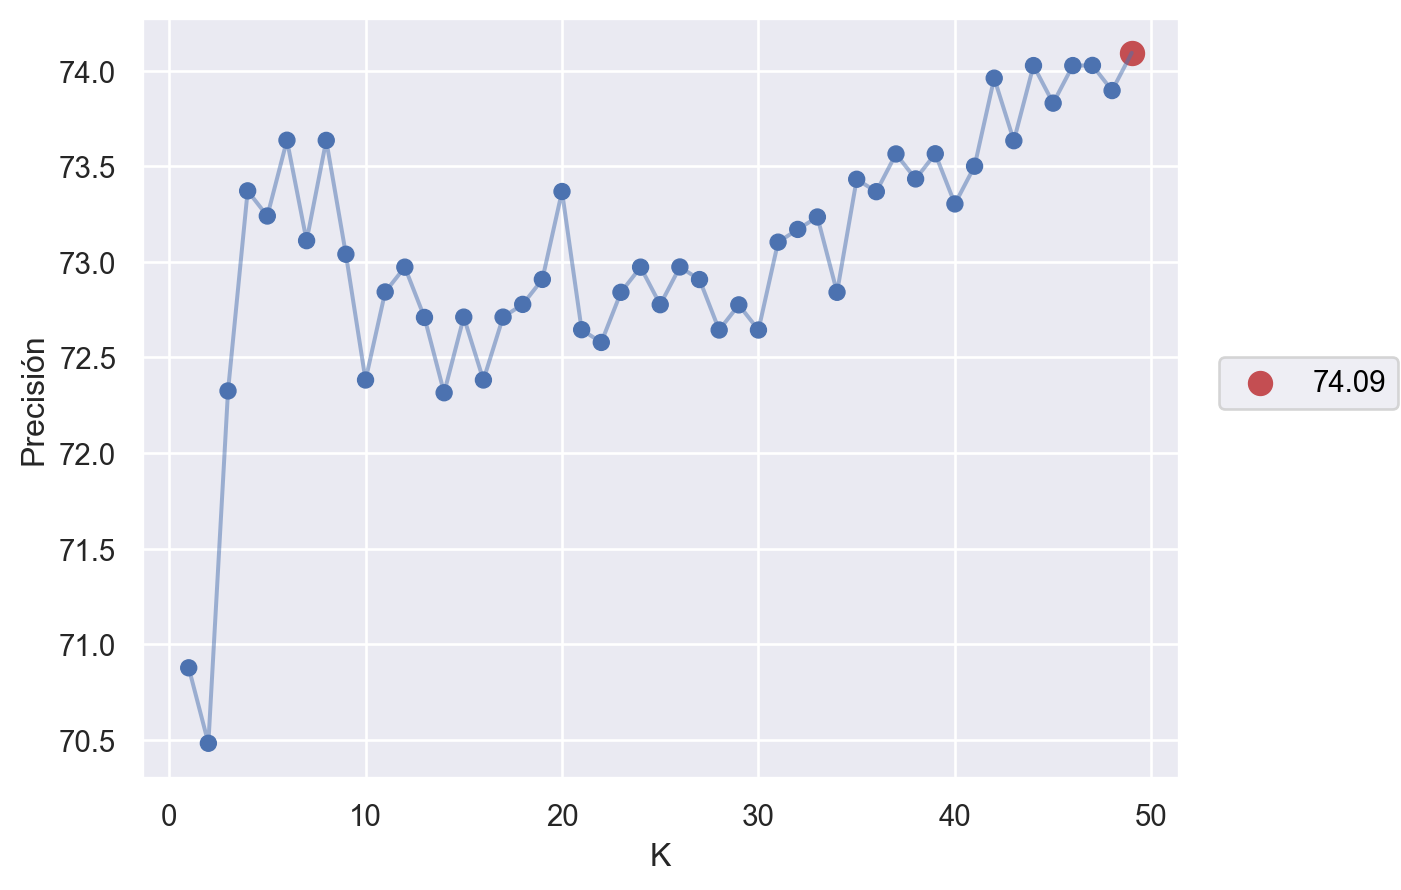

In [33]:
(
    so.Plot()
    .add(so.Line(alpha= 0.5), x = range(1,50), y = precision)
    .add(so.Dot(), x = range(1,50), y = precision)
    .add(so.Dot(color = 'r', pointsize= 9), x = [k], y = [precision[k-1]], label=  np.round(np.max(precision),2).astype(str))
    .label(x = 'K', y = 'Precisión')
)

In [34]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_train_pca)

NearestNeighbors(n_neighbors=49)

In [35]:
posiciones = y_train_pca

X_test_pca.index
aciertos = 0
for ind in X_test.index:
    distancias, indices = neighbors.kneighbors(X_test_pca.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == pca_clasif.iloc[ind]['Pos_filt']:
        aciertos +=1

pc_aciertos = (aciertos / X_test_pca.index.shape[0])*100

print('Porcentaje de aciertos usando PCA: ', np.round(pc_aciertos, 2), '%')

Porcentaje de aciertos usando PCA:  75.85 %


El porcentaje de aciertos utilizando PCA fue de 75.85%, mientras que sin utilizarlo fue de 82.68%. Por ende no se obtuvieron mejores resultados

8)

Con las chicas:

In [36]:
sl = pd.read_csv('./superleague2023.csv')
sl['Pos_filt'] = sl['Pos'].str.split(',').str[0]
sl.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,1,Princess Ademiluyi,eng ENG,"MF,FW",West Ham,17.0,2006.0,11,0,87,...,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03,MF
1,2,Michelle Agyemang,eng ENG,FW,Arsenal,17.0,2006.0,1,0,6,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,FW
2,3,Alyssa Aherne,eng ENG,MF,Everton,19.0,2004.0,1,0,1,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,MF
3,4,Olga Ahtinen,fi FIN,MF,Tottenham,NaN,NaN,16,10,923,...,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15,MF
4,5,Asmita Ale,eng ENG,DF,Leicester City,21.0,2001.0,6,4,296,...,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06,DF


In [37]:
indice_ast = df.columns.get_loc('MP') - 1

data_num_sl = sl.iloc[:,indice_ast:].drop(columns = 'Min')

data_num_sl.head()

,MP,Starts,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,...,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,11,0,1.0,0,1,1,0,0,0,0,...,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03,MF
1,1,0,0.1,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,FW
2,1,0,0.0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,MF
3,16,10,10.3,1,2,3,1,0,0,4,...,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15,MF
4,6,4,3.3,0,0,0,0,0,0,1,...,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06,DF


In [38]:
y_sl = data_num_sl['Pos_filt']
X_sl = data_num_sl.drop('Pos_filt', axis=1)

In [39]:
X_sl_train, X_sl_test, y_sl_train, y_sl_test = train_test_split(X_sl, y_sl, test_size=0.2, random_state=33)

In [40]:
precision = []
for num in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = num)
    pre = cross_val_score(knn, X_sl_train, y_sl_train, cv = 20)
    precision.append(pre.mean()*100)

In [41]:
k = np.argmax(precision) + 1
print(k, np.max(precision))

1 70.80128205128206


In [42]:
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_sl_train)

NearestNeighbors(n_neighbors=1)

In [43]:
posiciones = y_sl_train

aciertos = 0
for ind in X_sl_test.index:
    distancias, indices = neighbors.kneighbors(X_sl_test.loc[[ind]])
    votos = posiciones.iloc[indices.flatten()]
    if mode(votos) == sl.iloc[ind]['Pos']:
        aciertos +=1

pc_aciertos = (aciertos / X_sl_test.index.shape[0])*100

print('Porcentaje de aciertos: ', np.round(pc_aciertos, 2), '%')

Porcentaje de aciertos:  42.62 %


9)

a)

In [44]:
fichajes = pd.read_csv('./transfermarkt_fbref_201920.csv', delimiter = ';')
mercado = fichajes
for column in mercado.columns:
    if isinstance(mercado[column][1], str):
       mercado = mercado.drop(columns = column, axis = 1)
       print(column)

escalado = StandardScaler().fit_transform(mercado)

player
nationality
position
squad
position2
foot
league
Attendance
Season


In [45]:
fichajes[fichajes['player'] == 'Lionel Messi']

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
257,1649,Lionel Messi,ar ARG,"FW,MF",Barcelona,32,1987,112000000,170,Forward - Right Winger,...,2.16,66.4,36.0,30.4,0.8,54223,1,0,0.0,201920#


In [46]:
k = 11
mercado = pd.DataFrame(mercado)
mercado = mercado.dropna()
vecinos = NearestNeighbors(n_neighbors=k)
vecinos.fit(mercado)

NearestNeighbors(n_neighbors=11)

In [47]:
distancias, indices = vecinos.kneighbors(mercado.loc[[257]])

In [48]:
fichajes[fichajes.index.isin(indices[0])].drop(257)

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
206,1818,Jan Oblak,si SVN,GK,Atlético Madrid,26,1993,90000000,188,Goalkeeper,...,1.84,52.6,30.8,21.8,0.57,"42,236",1,0,0.0,201920#
253,1007,Antoine Griezmann,fr FRA,FW,Barcelona,28,1991,96000000,176,Forward - Second Striker,...,2.16,66.4,36.0,30.4,0.80,54223,1,0,0.0,201920#
695,2234,Jadon Sancho,eng ENG,"FW,MF",Dortmund,19,2000,117000000,180,Forward - Right Winger,...,2.03,59.2,39.4,19.8,0.58,57297,1,0,0.0,201920#
1270,1063,Kai Havertz,de GER,"MF,FW",Leverkusen,20,1999,81000000,189,Midfielder - Attacking Midfield,...,1.85,56.6,45.1,11.5,0.34,21236,0,0,0.0,201920#
1309,58,Trent Alexander-Arnold,eng ENG,DF,Liverpool,20,1998,99000000,180,Defender - Right-Back,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1321,1527,Sadio Mané,sn SEN,FW,Liverpool,27,1992,120000000,174,Forward - Left Winger,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1328,2207,Mohamed Salah,eg EGY,FW,Liverpool,27,1992,120000000,175,Forward - Right Winger,...,2.61,71.5,40.0,31.5,0.83,41955,1,1,0.0,201920#
1415,631,Kevin De Bruyne,be BEL,MF,Manchester City,28,1991,120000000,181,Midfielder - Attacking Midfield,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
1430,2399,Raheem Sterling,eng ENG,FW,Manchester City,24,1994,128000000,170,Forward - Left Winger,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#
1862,1780,Neymar,br BRA,"MF,FW",Paris S-G,27,1992,128000000,175,Forward - Left Winger,...,2.52,70.9,22.7,48.2,1.78,47517,1,0,0.0,201920#


Basandonos en los jugadores mas parecidos a Messi, recomendamos a Havertz dado que su valor es mas bajo

b)

In [49]:
y_mercado = mercado['value']
x_mercado = mercado.drop(columns='value')

In [50]:
mercado

,Column1,age,birth_year,value,height,games,games_starts,minutes,goals,assists,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
0,21,23,1996,4000000,178,31,23,2099,1,1,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
1,390,22,1997,4000000,188,31,14,1429,1,2,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
2,430,25,1994,4000000,183,17,15,1293,0,1,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
3,737,23,1995,4000000,172,31,30,2663,0,1,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
4,770,25,1993,1000000,188,25,24,2121,2,0,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,288,29,1989,10000000,179,32,31,2742,1,1,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2228,339,25,1993,8000000,175,20,8,764,0,2,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2229,619,20,1998,6000000,190,6,3,277,0,1,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0
2230,701,21,1998,11000000,177,18,10,928,2,2,...,-9,52,1.37,53.9,53.1,0.9,0.02,0,0,0.0


In [51]:
from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

In [52]:
modelo = linear_model.LinearRegression()

modelo.fit(x_mercado, y_mercado)


LinearRegression()

In [53]:
modelo.coef_
y_pred = modelo.predict(x_mercado)
r2_score(y_mercado, y_pred)

0.7019023085509907

In [54]:
indices = []
for indice in x_mercado.index:
    if (y_mercado[indice] - y_pred[indice]) < 0:
        indices.append(indice)
baratos = fichajes[fichajes.index.isin(indices)]
baratos

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,430,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,737,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,770,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
7,1027,John Guidetti,se SWE,FW,Alavés,27,1992,1000000,185,Forward - Centre-Forward,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,229,Jan Bednarek,pl POL,DF,Southampton,23,1996,12000000,189,Defender - Centre-Back,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#
2227,288,Ryan Bertrand,eng ENG,DF,Southampton,29,1989,10000000,179,Defender - Left-Back,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#
2228,339,Sofiane Boufal,ma MAR,"MF,FW",Southampton,25,1993,8000000,175,Forward - Left Winger,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#
2230,701,Moussa Djenepo,ml MLI,"MF,DF",Southampton,21,1998,11000000,177,Forward - Left Winger,...,1.37,53.9,53.1,0.9,0.02,23428,0,0,0.0,201920#


In [ ]:
Esta es la lista de los jugadores cuyo valor de mercado es

d)

In [55]:
fichajes_filt = fichajes[fichajes['value'] > 100000]
mas_sobrevalorado = fichajes[fichajes.index == (y_mercado - y_pred).argmax()]
mas_sobrevalorado

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
1858,1602,Kylian Mbappé,fr FRA,FW,Paris S-G,20,1998,180000000,178,Forward - Left Winger,...,2.52,70.9,22.7,48.2,1.78,47517,1,0,0.0,201920#


El jugador mas sobrevalorado es Kylian Mbappe segun nuestras estimaciones.

In [56]:
mas_infravalorado = fichajes[fichajes.index == (y_mercado - y_pred).argmin()]
mas_infravalorado

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
1429,2316,David Silva,es ESP,MF,Manchester City,33,1986,12000000,170,Midfielder - Attacking Midfield,...,2.13,93.0,34.7,58.3,1.53,37097,1,0,0.0,201920#


El jugador mas infravalorado es David Silva segun nuestras estimaciones

e)

In [57]:
reemplazo = mercado[['goals', 'age', 'assists', 'goals_per90', 'shots_total', 'goals_per_shot', 'passes', 'through_balls', 'crosses', 'dribbles_completed']]  
reemplazo

,goals,age,assists,goals_per90,shots_total,goals_per_shot,passes,through_balls,crosses,dribbles_completed
0,1,23,1,0.04,3,0.33,1014,1,30,14
1,1,22,2,0.06,20,0.05,333,1,19,26
2,0,25,1,0.00,8,0.00,533,2,13,16
3,0,23,1,0.00,20,0.00,1310,0,44,4
4,2,25,0,0.08,6,0.33,839,0,0,4
...,...,...,...,...,...,...,...,...,...,...
2227,1,29,1,0.03,19,0.05,1656,0,81,8
2228,0,25,2,0.00,21,0.00,325,1,30,54
2229,0,20,1,0.00,1,0.00,159,0,6,3
2230,2,21,2,0.19,20,0.10,264,3,16,48


In [58]:
k = 11
vecinos = NearestNeighbors(n_neighbors=k)
vecinos.fit(reemplazo)

NearestNeighbors(n_neighbors=11)

In [59]:
distancias, indices = vecinos.kneighbors(reemplazo.loc[[1858]])
fichajes[fichajes.index.isin(indices[0])].drop(1858).reset_index()

,index,Column1,player,nationality,position,squad,age,birth_year,value,height,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,243,2577,Ruben Vargas,ch SUI,"FW,MF",Augsburg,20,1998,9000000,174,...,1.06,42.1,54.9,-12.9,-0.38,20265,0,0,0.0,201920#
1,589,2031,Christian Pulisic,us USA,FW,Chelsea,20,1998,54000000,172,...,1.74,66.6,37.9,28.6,0.75,32023,1,0,0.0,201920#
2,1264,238,Karim Bellarabi,de GER,"FW,DF",Leverkusen,29,1990,12000000,184,...,1.85,56.6,45.1,11.5,0.34,21236,0,0,0.0,201920#
3,1523,1995,Alassane Plea,fr FRA,FW,M'Gladbach,26,1993,35000000,181,...,1.91,66.4,42.4,23.9,0.70,36078,1,0,0.0,201920#
4,1528,2483,Marcus Thuram,fr FRA,FW,M'Gladbach,21,1997,22000000,192,...,1.91,66.4,42.4,23.9,0.70,36078,1,0,0.0,201920#
5,1603,1343,Gaëtan Laborde,fr FRA,FW,Montpellier,25,1994,8000000,181,...,1.43,32.0,34.1,-2.1,-0.07,14147,0,0,0.0,201920#
6,1667,2325,Moses Simon,ng NGA,"FW,MF",Nantes,24,1995,6000000,168,...,1.32,27.8,33.5,-5.7,-0.20,24635,0,0,0.0,201920#
7,1689,1647,Dries Mertens,be BEL,FW,Napoli,32,1987,20000000,169,...,1.63,62.5,39.3,23.2,0.61,21622,0,0,0.0,201920#
8,1983,722,Moussa Doumbia,ml MLI,"FW,MF",Reims,24,1994,2000000,173,...,1.46,28.3,26.4,1.9,0.07,12932,0,0,0.0,201920#
9,2006,680,Raphael Dias Belloli,br BRA,"MF,FW",Rennes,22,1996,18000000,175,...,1.79,36.5,29.3,7.1,0.26,25893,0,0,0.0,201920#


In [60]:
print((y_mercado[indices[0]] - y_pred[indices[0]]))
(y_mercado[indices[0]] - y_pred[indices[0]]).min()

1858    8.354928e+07
1528   -1.657402e+07
1667   -1.480612e+07
243    -9.479545e+06
1264   -4.354531e+06
2006   -9.182109e+06
1603   -7.385348e+06
589     4.279704e+06
1523   -2.398627e+06
1983   -1.215211e+07
1689    4.130405e+06
Name: value, dtype: float64


-16574018.00892295

In [61]:
fichajes[fichajes.index == 1528]

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
1528,2483,Marcus Thuram,fr FRA,FW,M'Gladbach,21,1997,22000000,192,Forward - Left Winger,...,1.91,66.4,42.4,23.9,0.7,36078,1,0,0.0,201920#


El jugador que seleccionamos para reemplazar a Mbappe es Marcus Thuram. En 2020 su valor de mercado era de 22.000.000. Hoy en dia su valor es de 65.000.000, por lo que podemos afirmar que la recomendacion fue buena.